![example](images/microsoft_movies_analysis.jpeg)

# Microsoft Movie Analysis

**Author:** Steve Mukara Githinji
***

## Overview

This project analyzes data on movies to assist Microsoft's new movie studio make informed decisions on what types of fiims to create. The project employed descriptive analysis using data from online databases i.e. IMDB, Box Office Mojo and Rotten Tomatoes. This analysis showed that 'Kids and Family|Science Fiction and Fantasy' and 'Science Fiction and Fantasy' genres of films earned the most at the box office. Films also performed better internationally at the box office than in the USA. On average, films released in June, November and December earned the most at the box office. The analysis showed that 'Comedy, Documentary, Fantasy' and 'Documentary, Family, Musical' genres were the high rated by viewers. It also showed the top earning directors at the box office.

## Business Problem

Microsoft plans to dive into the lucrative multi-billion dollar film industry by setting up its own movie studio. Some good movies have been made cheaply in the past. However, with the advent of modern visual effects, large crews, expensve actors and marketing, the average movie budget has exploded over the last few decades, some stretching to over $100 million. With such a wide breadth of budgets, it can be tough to reach a consensus, especially when determining what types of films to make. 


As this is a capital-intensive venture, Microsoft needs a comprehensive analysis on the best performing genres at the box office. Microsoft should also join the game with knowledge on which directors make the best performing films. A film studio should consider the role of ratings and reviews on the success of a film. The effect of negative ratings tends to be stronger than that of positive ratings. Some genres receive higher ratings than others during a given period of time according to the prevailing cultural norms and industry standards. It is therefore important to know the current highest ranked genres by movie-goers and critics.

Booms in film revenues are driven by the seasonality of demand of the movies. For example, releasing a movie at the beginning of summer allows the movie to accumulate revenues during the whole summer season. An analysis showing the most profitable month to release films is an actionable insight for Microsoft's new studio. 


## Data Understanding



![example](images/online_databases2.PNG)

The source of the data used in this project is online databases of information related to films and television series. These are IMDB, Box Office Mojo and Rotten Tomatoes.

[IMDB](https://www.imdb.com/) is the largest, oldest and most popular free online resource for movie and TV shows. The data used in this project is a SQLite database. It stores 8 related tables of data such as movie ratings, movie akas, directors, writers etc, with data for over 73,000 films. This data was suitable for showing the most popular genres according to ratings by movie-goers by plotting a bar graph. However, this data was limited by its failure to show box office sales which would have been related to a film's rating.

[Box Office Mojo](https://www.boxofficemojo.com/) is an online box office reporting and analysis service owned by IMDB. Data from this site was in a CSV format which detailed each film's studio, domestic gross earnings, foreign gross earnings and year of release. This was used to show the yearly performance of films in the domestic market (USA) vis-à-vis the foreign market by analyzing the 'domesstic_gross' and 'foreign_gross' columns. It contained data for 3387 films. Its major limitation was that it did not show each film's genre.


[Rotten Tomatoes](https://www.rottentomatoes.com/) is an online aggregator of movie and TV show reviews from critics. The data used in this project was in a TSV format containing 11 columns and 1560 rows of individual films. The important categories of data for this project were rating, genre, director and box office earnings. The data analysis yielded the highest ranked films by genre, the highest earning films by genre and the top performing directors at the box office. However, the data contained such few films. 



### The Datasets

Begin by importing `pandas` as `pd`, `numpy` as `np`, and `matplotlib.pyplot` as `plt`, `seaborn` as `sns` and set the appropriate alias for each. Additionally, set `%matplotlib inline`.

In [30]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

Read in the data from Box Office Mojo site from a file named `bom.movie_gross.csv` and store it as a DataFrame in `box_office_mojo_df`. Display the `.head()` to ensure that everything loaded correctly.

In [31]:
# Load data with pandas and preview it
box_office_mojo_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
box_office_mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Read in the data from Rotten Tomatoes from a file named `rt.movie_info.tsv.gz` and store it as a DataFrame in `rotten_tomatoes_df`. Display the `.head()` to ensure it was loaded correctly.

In [32]:
# Load data from Rotten Tomatoes and preview it
rotten_tomatoes_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', index_col=0)
rotten_tomatoes_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Read in tables from IMDB from a SQL Database named `im.db`. Display the `.head()` to ensure that everything loaded correctly.

In [33]:
# Select all columns from movie_basics table and preview
conn = sqlite3.connect('zippedData/im.db')
movie_basics = pd.read_sql(
"""SELECT * 
FROM movie_basics;
""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [34]:
# Select all columns from movie_ratings table and preview
movie_ratings = pd.read_sql(
"""SELECT * 
FROM movie_ratings;
""", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Data Preparation

Preparation of the data involved answering the following questions:
* Does this data contain missing values?
* Are there any outliers?
* Does this data contain any duplicates? 
* Are the values in the expected datatype?


### 1. IMDB Database

In the cell below:
* Select `genres` and `averagerating` columns from `movie_basics` and `movie_ratings` tables respectively
* Join `movie_basics` and `movie_ratings` tables using the primary key `movie_id`
* Group the films according to `genres` and aggregate `averagerating` column to find mean of each genre on a new column `genre_avg_rating`
* Only include genres with `genre_avg_rating` above 7 to get top rated genres
* Sort by `genre_avg_rating` from highest to lowest
* Limit this data to only the top rated 15 genres since there are very many genres

In [39]:
# Join movie_basics and movie_ratings tables
movie_basics_and_ratings = pd.read_sql(
"""SELECT genres, AVG(averagerating) AS genre_avg_rating
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY genres
HAVING genre_avg_rating > 7
ORDER BY genre_avg_rating DESC
LIMIT 15
;
""", conn)

# View top 5 rows
movie_basics_and_ratings.head()

,genres,genre_avg_rating
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,"History,Sport",9.2
3,"Music,Mystery",9.0
4,Game-Show,9.0


Check to see if the data contains any missing values (NaNs) at all.

In [40]:
movie_basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            15 non-null     object 
 1   genre_avg_rating  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


Now we know there are no missing values.
Next, we check if there are any duplicated values.

In [41]:
movie_basics_and_ratings.duplicated().value_counts()

False    15
dtype: int64

There are no duplicated values. Check if there are ouotliers in the data

C:\Users\mukara\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


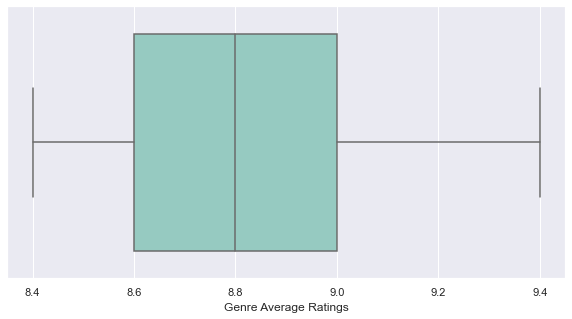

In [42]:
# Set a seaborn theme
sns.set_theme(style="darkgrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the average ratings
sns.boxplot(
    movie_basics_and_ratings['genre_avg_rating'], 
    palette='Set3')

# Add an informative axis label
ax.set(xlabel='Genre Average Ratings');

Therer are no outliers. The data is ready for modelling.

### 2. Rotten Tomatoes data for `genre` and `box office` modelling

First, check for missing values in the `genre` and `box_office` columns

In [10]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


Both columns contain missing values. The chosen solution to dealing with missing these values was to simply drop any rows that contain them. To replace these missing values would reduce the accuracy of our data. 

In [11]:
# Drop all rows with missing values in the `box_office` column
rotten_tomatoes_df = rotten_tomatoes_df.dropna(subset=['box_office'])

# Confirm missing rows were dropped
rotten_tomatoes_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      340 non-null    object
 1   rating        340 non-null    object
 2   genre         340 non-null    object
 3   director      299 non-null    object
 4   writer        273 non-null    object
 5   theater_date  334 non-null    object
 6   dvd_date      334 non-null    object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       338 non-null    object
 10  studio        305 non-null    object
dtypes: object(11)
memory usage: 31.9+ KB


Check the data for duplicate rows.

In [12]:
rotten_tomatoes_df.duplicated().value_counts()

False    339
True       1
dtype: int64

There is one dupplicate value. Below, drop the duplicated row.

In [13]:
# Drop the duplicated row
rotten_tomatoes_df = rotten_tomatoes_df.drop_duplicates()

# Confirm there are no duplicates
rotten_tomatoes_df.duplicated().value_counts()

False    339
dtype: int64

After using `.info` above, we saw that `box_office` column is an object datatype. Convert this to a float datatype.

In [14]:
# Remove commas ',' by replacing with empty string
rotten_tomatoes_df['box_office'] = rotten_tomatoes_df['box_office'].str.replace(',', '')

# Convert the column values from object datatype to float datatype
rotten_tomatoes_df['box_office'] = rotten_tomatoes_df['box_office'].astype(float)

#Confirm box_office column values are now float datatypes
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      339 non-null    object 
 1   rating        339 non-null    object 
 2   genre         339 non-null    object 
 3   director      299 non-null    object 
 4   writer        272 non-null    object 
 5   theater_date  333 non-null    object 
 6   dvd_date      333 non-null    object 
 7   currency      339 non-null    object 
 8   box_office    339 non-null    float64
 9   runtime       337 non-null    object 
 10  studio        304 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.8+ KB


The data contains a `currency` column. Therefore confirm that we are working with a single currency. 

In [15]:
# Check counts of every unique value in currency column
rotten_tomatoes_df['currency'].value_counts()

$    339
Name: currency, dtype: int64

The only currency used is $. 

Next, group the data by `genre` and aggregate the `box_office` by the mean into a new dataframe `grouped_rotten_tomatoes`. The result should be sorted in descending order to make a new Series `sorted_grouped_rotten_tomatoes`and restricted to the top 10 `box_office` values.

In [16]:
# Group by genre column and find mean of box_office values
grouped_rotten_tomatoes = rotten_tomatoes_df.groupby('genre')['box_office'].mean()

# Sort by descending order
sorted_grouped_rotten_tomatoes = grouped_rotten_tomatoes.sort_values(ascending= False)

# Limit the data to the top 10 box_office earnings
sorted_grouped_rotten_tomatoes = sorted_grouped_rotten_tomatoes.iloc[:10]

# Confirm the resulting Series
sorted_grouped_rotten_tomatoes

genre
Kids and Family|Science Fiction and Fantasy                                    2.618359e+08
Science Fiction and Fantasy                                                    1.908711e+08
Action and Adventure|Science Fiction and Fantasy                               1.420119e+08
Action and Adventure|Drama|Science Fiction and Fantasy                         1.391112e+08
Drama|Horror|Mystery and Suspense|Romance                                      1.285797e+08
Comedy|Kids and Family|Romance                                                 1.277069e+08
Drama|Science Fiction and Fantasy|Romance                                      1.274908e+08
Action and Adventure|Animation|Kids and Family                                 1.231882e+08
Action and Adventure|Drama|Mystery and Suspense|Science Fiction and Fantasy    1.190000e+08
Action and Adventure|Animation|Comedy                                          1.140536e+08
Name: box_office, dtype: float64

This data is now ready for visualization.

### 3. Rotten Tomatoes data for `theatre_date` and `box office` modelling

Check if `theatre_date` column has any missing values.

In [17]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      339 non-null    object 
 1   rating        339 non-null    object 
 2   genre         339 non-null    object 
 3   director      299 non-null    object 
 4   writer        272 non-null    object 
 5   theater_date  333 non-null    object 
 6   dvd_date      333 non-null    object 
 7   currency      339 non-null    object 
 8   box_office    339 non-null    float64
 9   runtime       337 non-null    object 
 10  studio        304 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.8+ KB


It contains 6 missing values. The chosen solution is to drop these missing values.

The `theater_date` values contain month, day and year whereas only the month is required. This requires a lambda function to slice and obtain the first 3 characters.

The dataframe is then grouped by the `theater_date` column and aggregated by the mean method. Next, the resulting dataframe is sorted chronologically by month.

In [18]:
# Drop rows with missing theater_date values
rotten_tomatoes_df = rotten_tomatoes_df.dropna(subset=['theater_date'])

# Split theater_date string by slicing first 3 characters which represent the month
rotten_tomatoes_df['theater_date'] = rotten_tomatoes_df['theater_date'].map(lambda x: x[:3])

""" 
Group by theater_date column and aggregate to obtain average box_office values
Rename this new dataframe as theater_date_rotten_tomatoes_df
"""
theater_date_rotten_tomatoes_df = rotten_tomatoes_df.groupby('theater_date').mean()

# Order data by month from January to December
new_order =["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
theater_date_rotten_tomatoes_df = theater_date_rotten_tomatoes_df.reindex(new_order, axis=0)

# Reset dataframe index and confirm data is ok
theater_date_rotten_tomatoes_df = theater_date_rotten_tomatoes_df.reset_index()
theater_date_rotten_tomatoes_df

,theater_date,box_office
0,Jan,3.740066e+07
1,Feb,4.518768e+07
2,Mar,2.867936e+07
3,Apr,3.041570e+07
4,May,3.970367e+07
5,Jun,5.163442e+07
6,Jul,3.977743e+07
7,Aug,2.309728e+07
8,Sep,2.063305e+07
9,Oct,3.533408e+07


The dataframe above is now ready for visualization.

### 4. Rotten Tomatoes data for `director` and `box office` modelling

Initially use the `info()` method to print out information about the DataFrame. Here check if `director` column contains any missing values. 

In [19]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      333 non-null    object 
 1   rating        333 non-null    object 
 2   genre         333 non-null    object 
 3   director      295 non-null    object 
 4   writer        269 non-null    object 
 5   theater_date  333 non-null    object 
 6   dvd_date      333 non-null    object 
 7   currency      333 non-null    object 
 8   box_office    333 non-null    float64
 9   runtime       331 non-null    object 
 10  studio        300 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.2+ KB


It contains 6 missing values. The chosen solution is to drop these missing values.

Group the resulting DataFrame by `director` column and aggregate by mean to find the average `box_office` earnings for each director. Sort the DataFrame by `box_office` in descending order and limit it to `10` to determine the top performing directors.

In [20]:
# Drop rows with missing values for director column
director_rotten_tomatoes_df = rotten_tomatoes_df.dropna(subset=['director'])

# Group by director and find average box_office for each director
director_rotten_tomatoes_df = director_rotten_tomatoes_df.groupby('director').mean()
director_rotten_tomatoes_df = director_rotten_tomatoes_df.reset_index()

# Sort DataFrame by box_office column in descending order
director_rotten_tomatoes_df = director_rotten_tomatoes_df.sort_values(by='box_office', ascending= False)

# Slice to obtain top 10 directors and view DataFrame
director_rotten_tomatoes_df = director_rotten_tomatoes_df.iloc[:10]
director_rotten_tomatoes_df

,director,box_office
168,Mel Gibson,368000000.0
195,Peter Jackson,303001229.0
29,Chris Columbus,261835892.0
125,Joel Zwick,241250669.0
193,Peter Berg,227946274.0
108,Jay Roach,221811205.0
142,Justin Lin,209805005.0
215,Robert Stromberg,190871149.0
7,Andrew Tennant|Andy Tennant,177575142.0
188,Paul Greengrass,176049130.0


This data is now ready for modelling.

### 5. Box Office Mojo data for `domestic_gross` and `foreign_gross` modelling

Check the DataFrame for duplicated rows.

In [21]:
box_office_mojo_df.duplicated().value_counts()

False    3387
dtype: int64

There are no duplicated rows. Next, use info() method to check for missing values in `year`, `domestic_gross` and `foreign_gross` columns.

In [22]:
box_office_mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Both `foreign_gross` and `domestic_gross` columns contain missing values. The rows with missing data will be dropped because 

The `foreign_gross` values should be float datatypes. Therefore, delete commas and convert the values from objects to float64 datatypes. 

In [23]:
# Drop rows with missing values
box_office_mojo_df = box_office_mojo_df.dropna(subset=['foreign_gross', 'domestic_gross'])

# Remove commas from the objects
box_office_mojo_df['foreign_gross'] = box_office_mojo_df['foreign_gross'].str.replace(',', '')

# Convert from object to float64 datatypes
box_office_mojo_df['foreign_gross'] = box_office_mojo_df['foreign_gross'].astype(float)

# Confirm datatypes and missing rows dropped
box_office_mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.2+ KB


Group the DataFrame by `year` column and aggregate by finding the average `foreign_gross` and `domestic_gross` earnings for each year.

In [24]:
# Group the DataFrame and aggregate by mean
grouped_box_office_mojo_df = box_office_mojo_df.groupby('year').mean()

# View DataFrame
grouped_box_office_mojo_df

,domestic_gross,foreign_gross
year,,
2010,3.285708e+07,4.651350e+07
2011,3.407478e+07,5.383563e+07
2012,4.402413e+07,6.997113e+07
2013,5.279425e+07,8.290121e+07
2014,4.336745e+07,7.246439e+07
2015,5.655194e+07,7.975977e+07
2016,5.661299e+07,9.886140e+07
2017,5.941676e+07,1.125928e+08
2018,6.222173e+07,1.010086e+08


The data has been prepared and is ready for modelling.

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### 1. Top Rated Film Genres

Film viewers' and critics' ratings are an important indicator to movie studios on the most popular genres of the time. High ratings translate to high box office sales as many movie goers will consult online ratings before deciding which movie tickets to buy. This analysis found the average rating of films grouped by genre and plotted a bar graph of the 15 most popular genres. A new movie studio needs to attract a fanbase from the get go by making films that will receive positive reviewer critics. This will help Microsoft decide which genres of films to make that are more likely to create a buzz on online movie review sites and social media.

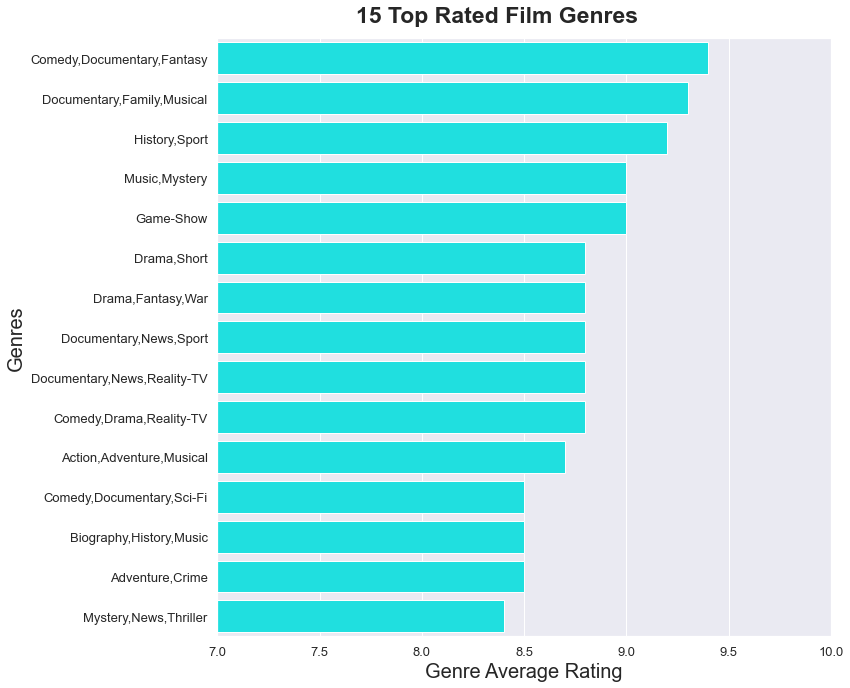

In [91]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots(figsize=(11, 11))

# Create horizontal bars 
sns.barplot(x='genre_avg_rating', y='genres', 
            data=movie_basics_and_ratings, color='cyan')

# set x axis limits and labels
ax.set_xlim(7, 10)
ax.set_xlabel("Genre Average Rating", fontsize=20)
ax.set_ylabel("Genres", fontsize=20)
ax.tick_params(labelsize=13)

# Add title
fig.text(
    0.3, 0.9, "15 Top Rated Film Genres", 
    fontsize=23, fontweight="bold"
);

### 2. Top Film Genres at the Box Office

Box office sales are arguably the most important indicator of the success of a movie. Films were grouped according genre and the average box office sales of each group calculated. This will inform Microsoft on the best performing film genres.

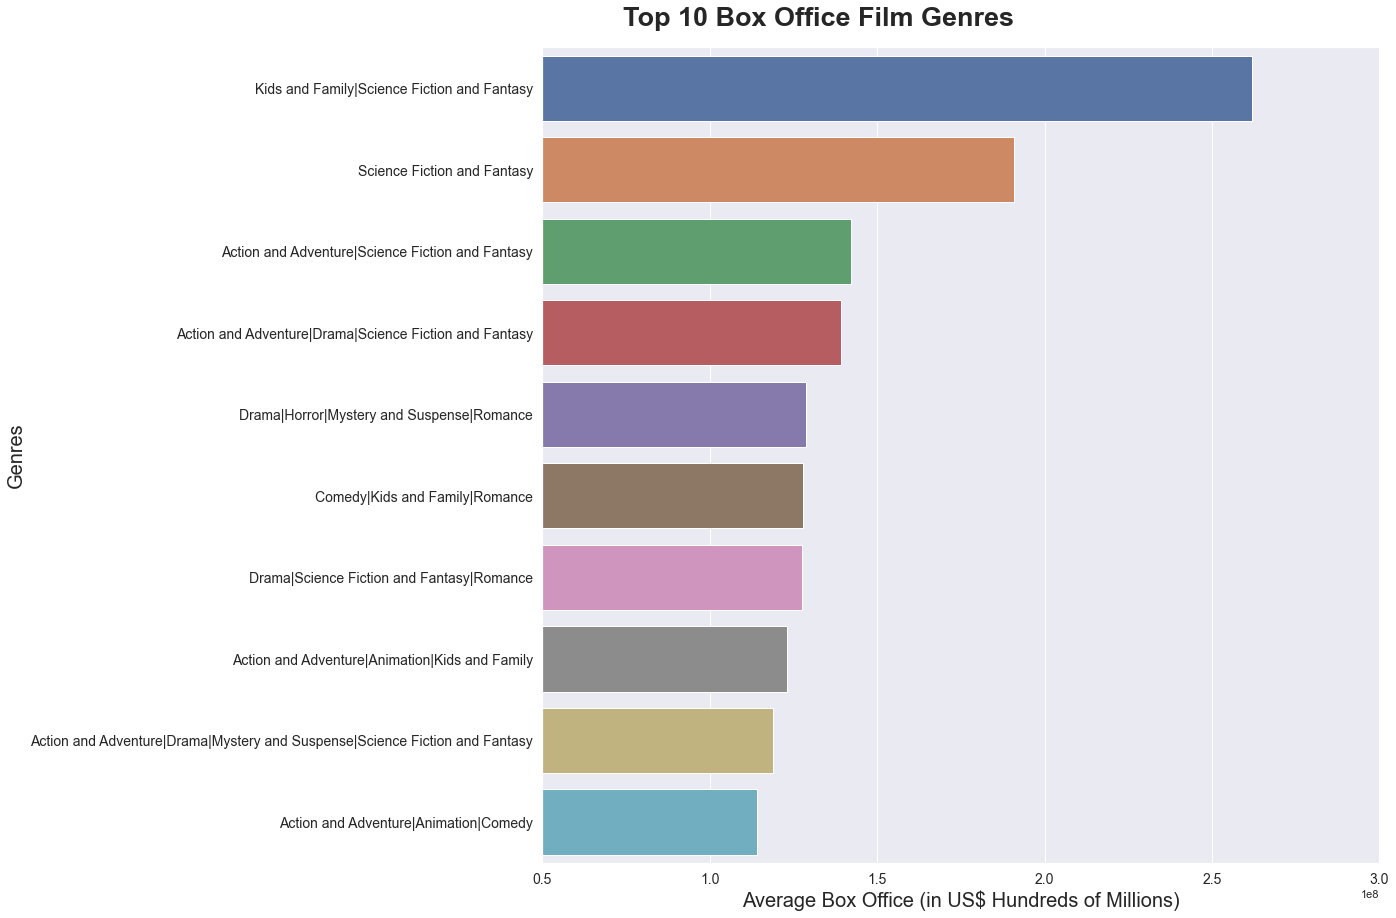

In [90]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots(figsize=(15, 15))

# Create horizontal bars 
sns.barplot(x=sorted_grouped_rotten_tomatoes.values, 
            y=sorted_grouped_rotten_tomatoes.index, 
            orient='h')

# set x axis limits and labels
ax.set_xlim(50000000, 300000000)
ax.set_xlabel("Average Box Office (in US$ Hundreds of Millions)", fontsize=20)
ax.set_ylabel("Genres", fontsize=20)
ax.tick_params(labelsize=14)

# Add title
fig.text(
    0.2, 0.9, "Top 10 Box Office Film Genres", 
    fontsize=27, fontweight="bold"
);

### 3. Average Box Office Sales by Month

Movie demand is seasonal. Hence it is important to be strategic in the month to release a movie. This is a plot of the monthly average box office sales of movies over a period of 9 years (2010-2018). With this knowledge Microsoft can time its releases for maximum profitability.

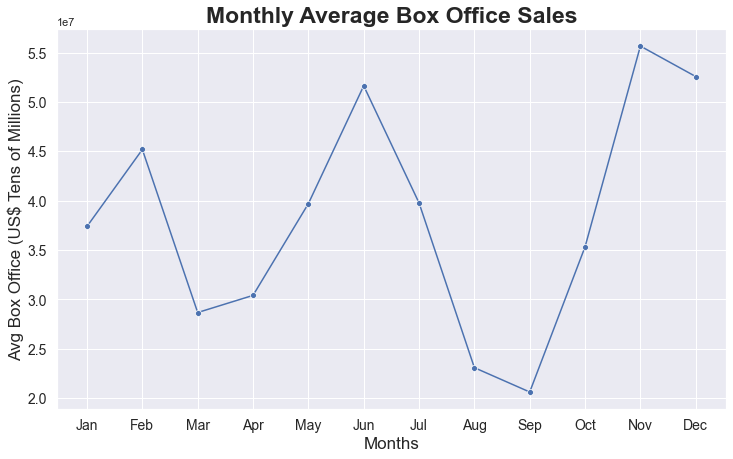

In [133]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots(figsize=(12, 7))

# Create a lineplot
sns.lineplot(x=theater_date_rotten_tomatoes_df['theater_date'], 
             y=theater_date_rotten_tomatoes_df['box_office'],
            marker="o")

# Set labels
ax.set_xlabel("Months", fontsize=17)
ax.set_ylabel("Avg Box Office (US$ Tens of Millions)", fontsize=17)
ax.tick_params(labelsize=14)

# Add title
ax.set_title("Monthly Average Box Office Sales", fontsize=23, fontweight="bold");

### 4. Top 10 Performing Directors at the Box Office

A film director is a person who controls a film's artistic and dramatic aspects and visualizes the screenplay (or script) while guiding the film crew and actors in the fulfilment of that vision. A director is therefore one of the most important determinants in the success of a film. This analysis found the average box office earnings of film directors and visualized the top 10.

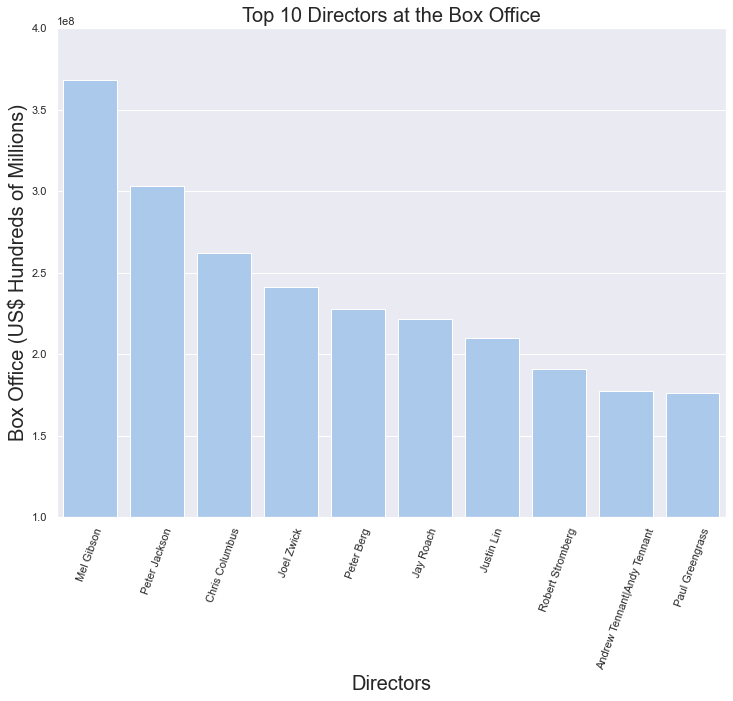

In [125]:
# Initialize a Figure and an Axes and set color code
fig, ax = plt.subplots(figsize=(12, 9))
sns.set_color_codes("pastel")

# Create a barplot 
sns.barplot(x=director_rotten_tomatoes_df['director'], y=director_rotten_tomatoes_df['box_office'], 
            data=director_rotten_tomatoes_df,
            color="b")

# Set labels and limits
ax.set_ylim(100000000, 400000000)
ax.set_title('Top 10 Directors at the Box Office', fontsize=20)
ax.set_xlabel('Directors', fontsize=20)
ax.set_ylabel('Box Office (US$ Hundreds of Millions)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

### 5. Domestic vs Foreign Gross

The marketing of a film is an important factor in its production. Without ads, no one will know a film exists. It ialso an expensive affair. Microsoft should know where to invest its marketing budget i.e. locally or abroad. Here we plot a line graph of domestic and foreign gross for a period of 9 years (2010-2018).

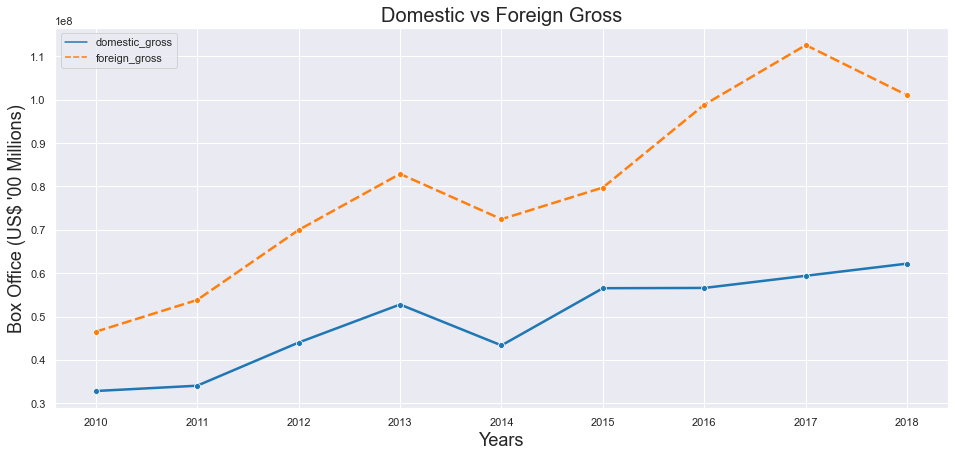

In [130]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots(figsize=(16, 7))

# Create a lineplot
sns.lineplot(data=grouped_box_office_mojo_df, 
             palette="tab10", 
             linewidth=2.5, marker="o")

# Set labels and limits
ax.set_title('Domestic vs Foreign Gross', fontsize=20)
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel("Box Office (US$ '00 Millions)", fontsize=18);

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***